In [2]:
from pyspark.sql import SparkSession

MAX_MEMORY = "5g"
spark = SparkSession.builder.master("local")\
                    .appName("ml_taix")\
                    .config("spark.excutor.memory", MAX_MEMORY)\
                    .config("spark.driver.memory", MAX_MEMORY).getOrCreate()

23/02/14 15:10:10 WARN Utils: Your hostname, imhaneul-ui-MacBookPro.local resolves to a loopback address: 127.0.0.1; using 172.30.1.82 instead (on interface en0)
23/02/14 15:10:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/14 15:10:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [66]:
import os 

trip_data = f"{os.getcwd()}/data/2020"
trip_directory = spark.read.parquet(f"file:///{trip_data}/*")
trip_directory.createOrReplaceTempView("trips")

In [4]:
trip_directory.printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- originating_base_num: string (nullable = true)
 |-- request_datetime: timestamp (nullable = true)
 |-- on_scene_datetime: timestamp (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- trip_time: long (nullable = true)
 |-- base_passenger_fare: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- bcf: double (nullable = true)
 |-- sales_tax: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- driver_pay: double (nullable = true)
 |-- shared_request_flag: string (nullable = true)
 |-- shared_match_flag: string (nullable = true)
 |-- access_a_ride_flag: string (nul

In [5]:
qs = """
SELECT
    pickup_datetime,
    PULocationID as pickup_location_id,
    DOLocationID as drop_location_id,
    tips,
    driver_pay,
    trip_miles,
    trip_time
FROM 
    trips
"""
spark.sql(qs).describe().show()
tr_data = spark.sql(qs)
tr_data.createOrReplaceTempView("trip_data")

+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|pickup_location_id|  drop_location_id|              tips|        driver_pay|        trip_miles|         trip_time|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|         143309871|         143309871|         143309871|         143309871|         143309871|         143309871|
|   mean|135.92875505414418|139.09949075315265|0.5364331266482734|14.211915859793367|4.6088413219490825|1018.6358777268036|
| stddev|   76.273342419336| 78.33690451151065| 2.018249850934298|12.110340608087894| 5.182921839431114| 689.3967862882561|
|    min|                 1|                 1|               0.0|           -273.08|               0.0|                 0|
|    max|               265|               265|             564.0|           4894.62|           1310.51|             85804|
+-------

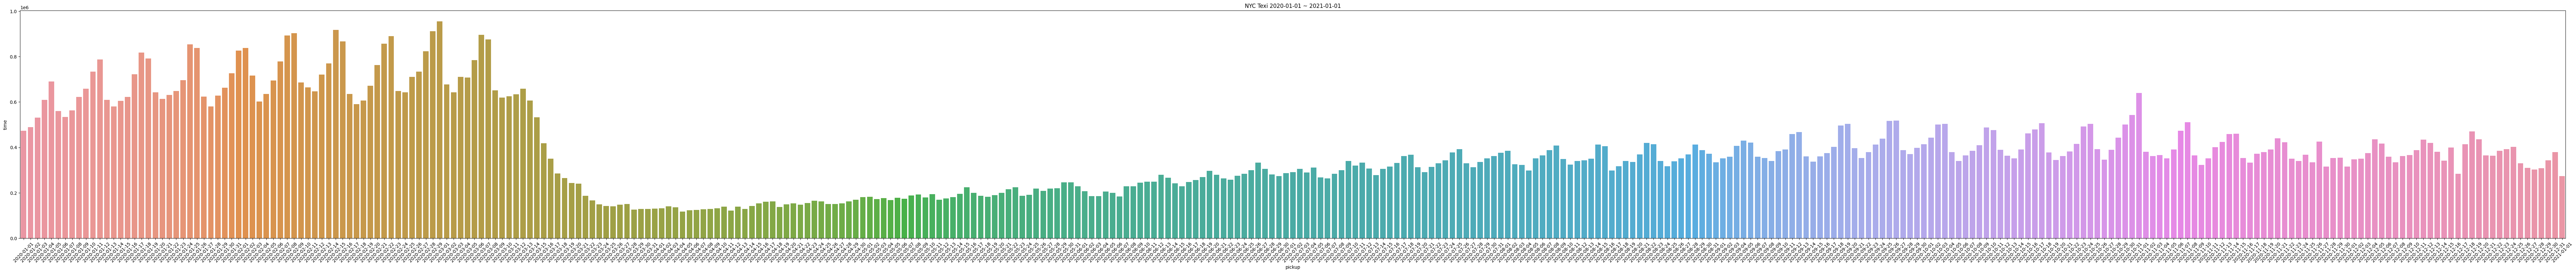

In [6]:
qs = """
SELECT 
    pickup, 
    count(*) as time
FROM
    (SELECT 
        split(pickup_datetime, " ")[0] as pickup
    FROM 
        trips    
    )
GROUP BY 
    pickup
ORDER BY 
    pickup
"""
time_data = spark.sql(qs).toPandas()

import seaborn as sns 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(100, 9))
sns.barplot(x="pickup", y="time", data=time_data)
plt.xticks(rotation=45)
plt.title("NYC Texi 2020-01-01 ~ 2021-01-01")
plt.show()

           date  pickup
0    2020-01-01  472471
1    2020-01-02  489748
2    2020-01-03  531514
3    2020-01-04  609353
4    2020-01-05  689872
..          ...     ...
116  2020-04-26  151126
117  2020-04-27  151104
118  2020-04-28  154141
119  2020-04-29  162099
120  2020-04-30  169623

[121 rows x 2 columns]


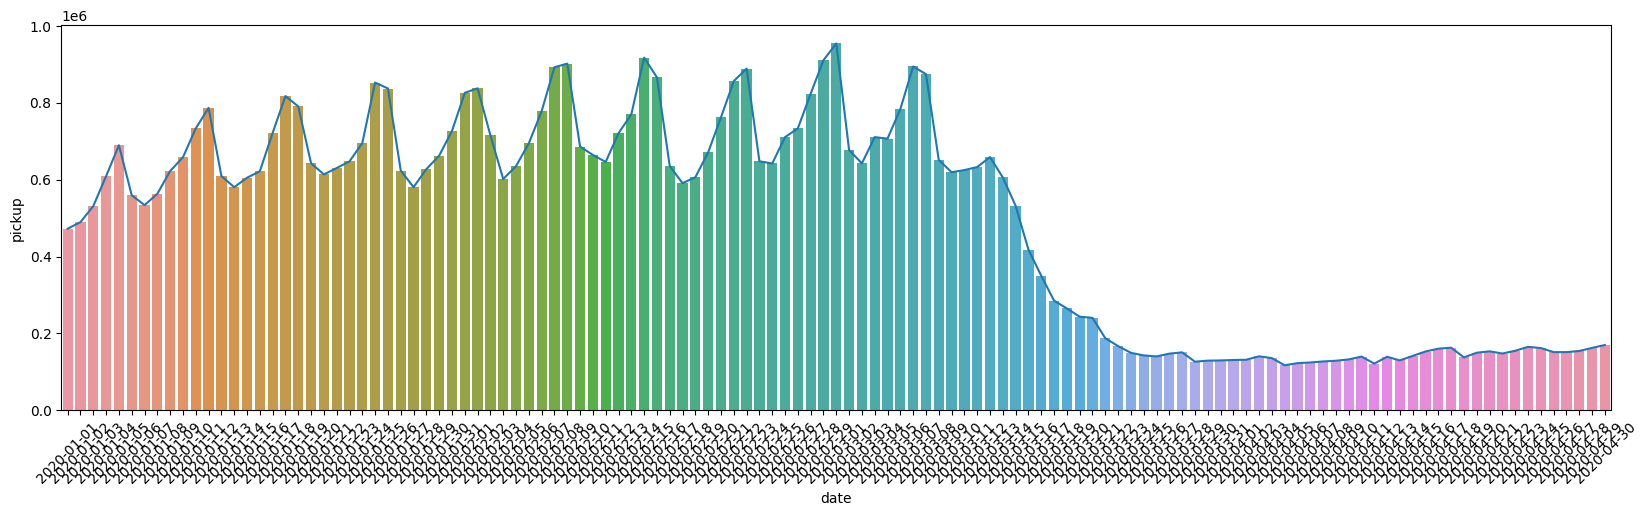

In [70]:
qs_2020_1to4 = """
SELECT 
    date,
    count(*) as pickup
FROM
    (SELECT 
        split(pickup_datetime, " ")[0] as date
    FROM 
        trips   
    )
GROUP BY 
    date 
HAVING 
    date >= "2020-01-01"
    AND date < "2020-05-01"
ORDER BY
    date
"""
data_2020_1_4 = spark.sql(qs_2020_1to4)

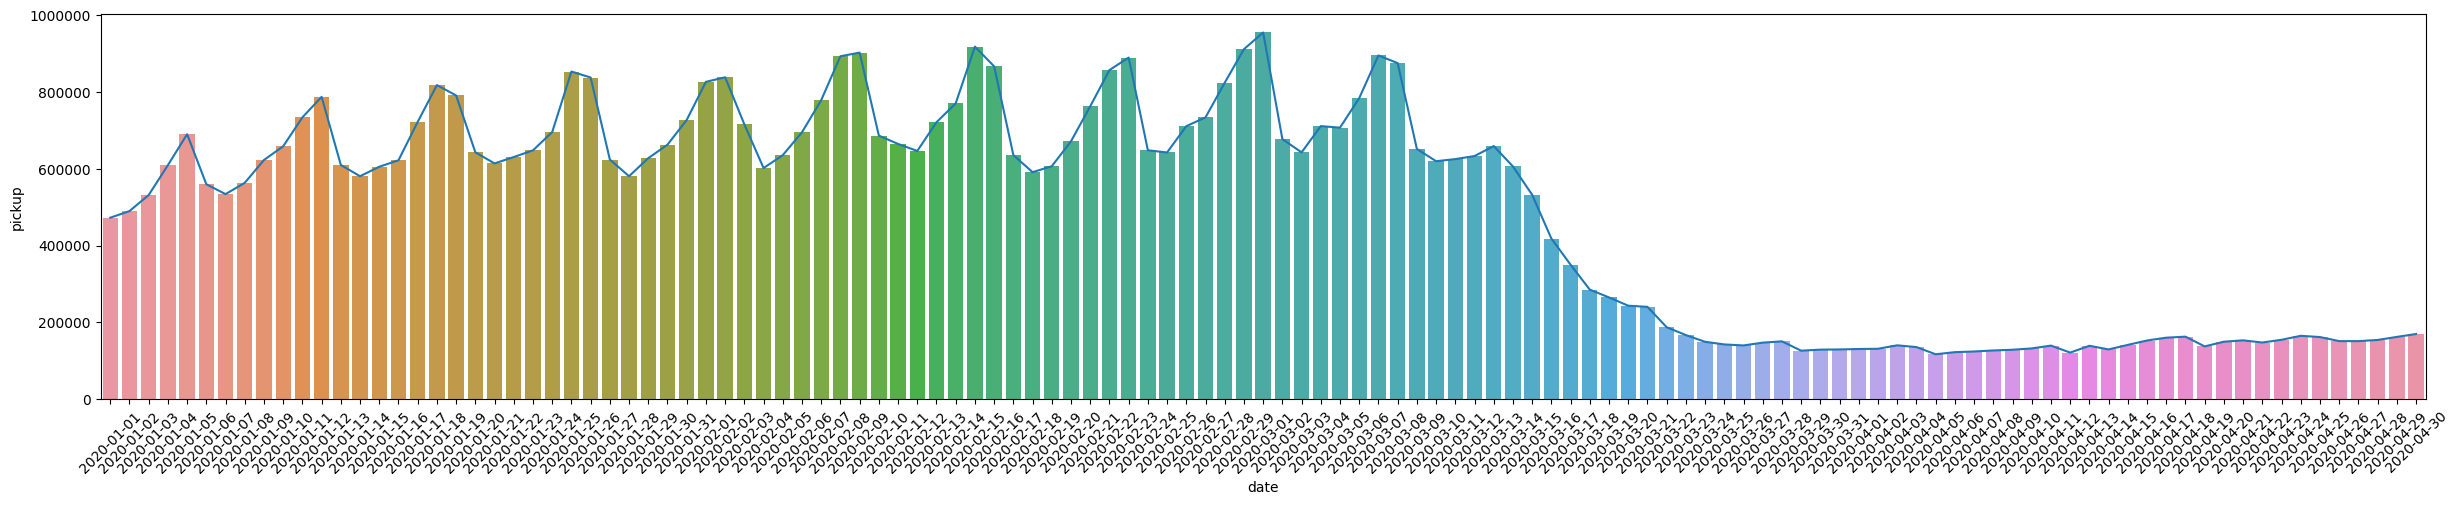

In [77]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.lineplot(x="date", y="pickup", data=data_2020_1_4)
sns.barplot(x="date", y="pickup", data=data_2020_1_4)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()